In [1]:
from Bio.Affy import CelFile
import glob
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [2]:
filenames = pd.read_csv(r"D:\Datasets\CAMDA-DILI\CMAP_CAMDA\CAMDA_Challenge_dataset_filenames.csv")

train_fnames = filenames[filenames["Data Type"]=="Training"]

positives = train_fnames[train_fnames["Class Label"]==1]
negatives = train_fnames[train_fnames["Class Label"]==0]

In [3]:
reload(CelFile)
files = {}
for fname in tqdm.tqdm(filenames["MCF7 Compound .cel file name"]):
    if "." in fname:
        mode = "rb"
    else:
        mode = "r"
        
    with open(fr"D:\Datasets\CAMDA-DILI\CMAP_CAMDA\MCF7\\{fname}.CEL", mode) as handle:
        c = CelFile.read(handle)
        files[fname] = c

100%|████████████████████████████████████████████████████████████████████████████████| 276/276 [02:02<00:00,  2.26it/s]


In [4]:
positives_intensities = []
for fname in positives["MCF7 Compound .cel file name"]:
    if len(files[fname].intensities)==744:
        positives_intensities.append(files[fname].intensities)

positives_intensities = np.array(positives_intensities)

In [32]:
negative_intensities = []
for fname in negatives["MCF7 Compound .cel file name"]:
    if len(files[fname].intensities)==744:
        negative_intensities.append(files[fname].intensities)

negative_intensities = np.array(negative_intensities)

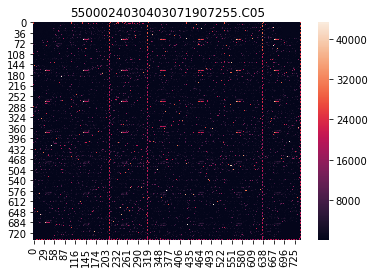

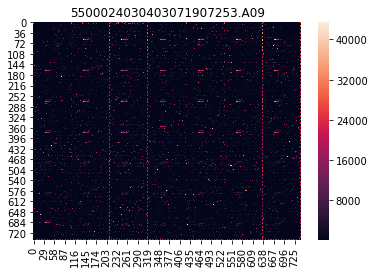

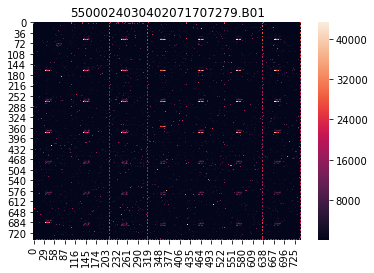

In [6]:
for fname in list(files.keys())[:3]:
    sns.heatmap(files[fname].intensities)
    plt.title(fname)
    plt.show()

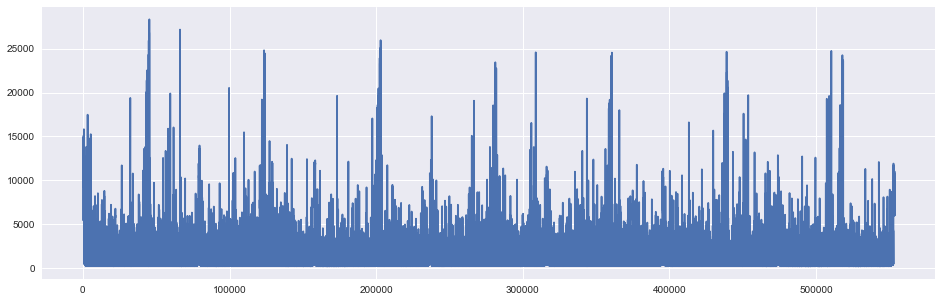

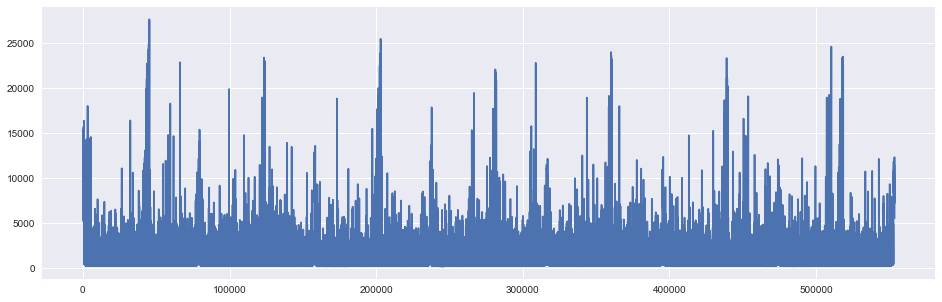

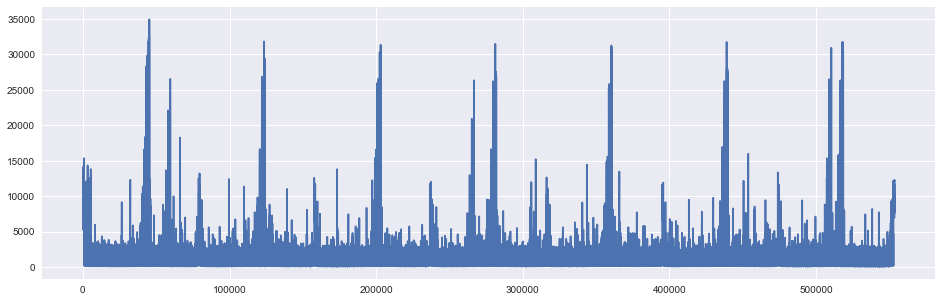

In [25]:
import scipy.signal as signal

plt.style.use('seaborn')
filt = np.ones(10)/10

for fname in list(files.keys())[:3]:
    shape = files[fname].intensities.shape
    plt.figure(figsize=(16,5))
    intensities = files[fname].intensities.ravel()
    intensities = np.convolve(intensities, filt, 'same')
    plt.plot(intensities)

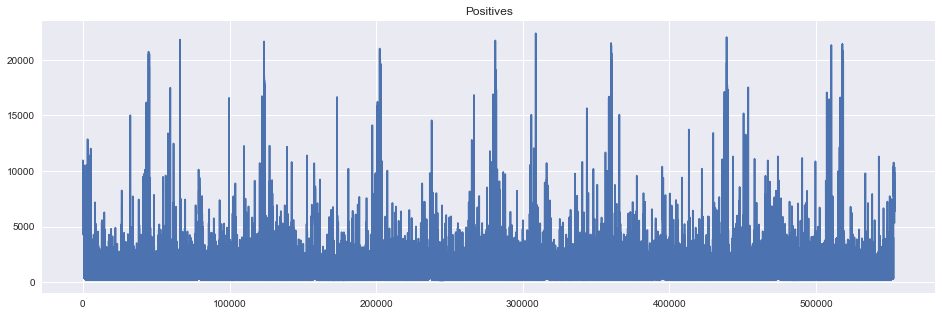

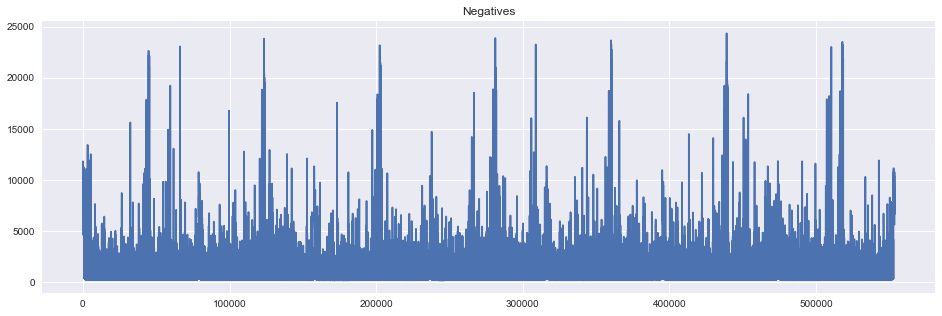

In [35]:
filt = np.ones(10)/10

plt.figure(figsize=(16,5))
intensities = positives_intensities.mean(axis=0).ravel()
intensities = np.convolve(intensities, filt, 'same')
plt.plot(intensities)
plt.title("Positives")

plt.figure(figsize=(16,5))
intensities = negative_intensities.mean(axis=0).ravel()
intensities = np.convolve(intensities, filt, 'same')
plt.title("Negatives")
plt.plot(intensities);

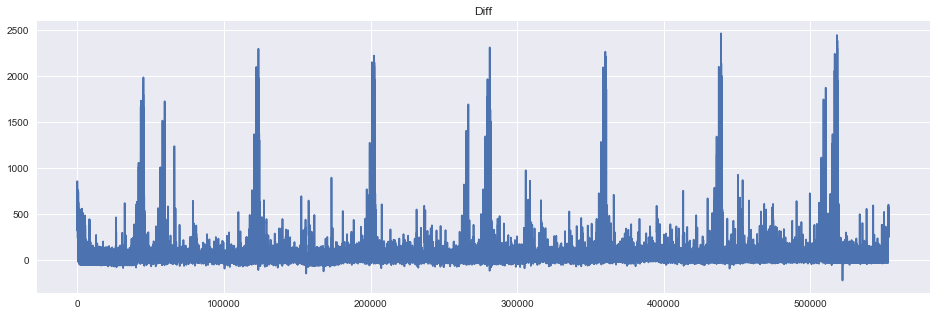

In [36]:
filt = np.ones(10)/10

plt.figure(figsize=(16,5))
intensities = negative_intensities.mean(axis=0).ravel() - positives_intensities.mean(axis=0).ravel()
intensities = np.convolve(intensities, filt, 'same')
plt.title("Diff")
plt.plot(intensities);

Apparently, average negative sample has much higher values than average positive - save for a few values

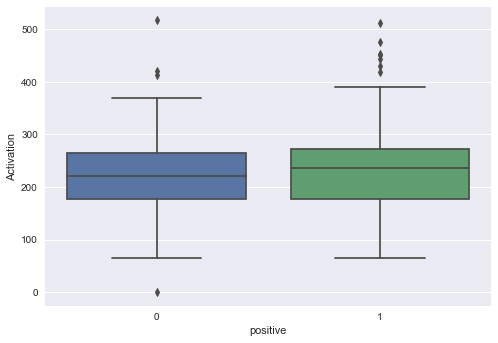

In [78]:
min_ind = np.unravel_index(np.argmin(intensities), (744, 744))

data = [negative_intensities[:, min_ind[0], min_ind[1]], positives_intensities[:, min_ind[0], min_ind[1]]]
df1 = pd.DataFrame(data[0], columns=['Activation']).assign(positive=0)
df2 = pd.DataFrame(data[1], columns=['Activation']).assign(positive=1)

biggest_diff_df = pd.concat((df1, df2))

sns.boxplot(x='positive', y='Activation', data=biggest_diff_df);

In [86]:
import scipy.stats as stats
stats.ttest_ind(biggest_diff_df[biggest_diff_df['positive']==0].values[:, 0], biggest_diff_df[biggest_diff_df['positive']==1].values[:, 0])

Ttest_indResult(statistic=-0.6556925486967717, pvalue=0.5128409776523537)

In [85]:
biggest_diff_df[biggest_diff_df['positive']==0]

,Activation,positive
0,1.410000e+02,0
1,3.329841e-39,0
2,2.715000e+02,0
3,1.433000e+02,0
4,1.593000e+02,0
5,2.125000e+02,0
6,1.888000e+02,0
7,1.710000e+02,0
8,1.990000e+02,0
9,3.108000e+02,0
